In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spotipy as sp


In [2]:
featsDF=pd.read_csv("/app/data/data.csv")

featsDF.head(10)

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6pCBRjjwhfyafZQPWx8KPK,0.670,0.567,2,-9.732,1,0.0357,0.32800,0.015000,0.0873,0.4340,139.995
1,6NXKNt6jyg6vPUa8rKS7BA,0.503,0.598,2,-8.273,1,0.0362,0.12800,0.098300,0.1060,0.1960,162.905
2,4O7kxdfjLOFUwIB6Q63ScX,0.468,0.182,0,-15.562,1,0.0401,0.83700,0.013200,0.0678,0.0382,155.102
3,12vSf3woc2toFvHxwjLI5v,0.465,0.267,0,-14.264,1,0.0315,0.73400,0.678000,0.2050,0.0757,132.002
4,7HFgnF1oPMzkCqEMBOA2yI,0.445,0.773,2,-7.227,1,0.0441,0.00539,0.153000,0.1310,0.3130,191.966
5,7HFgnF1oPMzkCqEMBOA2yI,0.445,0.773,2,-7.227,1,0.0441,0.00539,0.153000,0.1310,0.3130,191.966
6,47DKI4RxI8ZW0sBqDenMhO,0.592,0.555,1,-10.499,0,0.0381,0.66200,0.452000,0.1110,0.1420,156.957
7,3W3RQneS2yhA7E5l1dJW18,0.553,0.711,7,-7.714,1,0.0453,0.06300,0.000008,0.0759,0.2990,99.997
8,3T7hn54qWtZIEpJK2XeClP,0.331,0.523,5,-8.321,1,0.0375,0.22700,0.001140,0.1440,0.3050,87.782
9,7ac29SFNW0dM6o394uh3P3,0.580,0.559,4,-9.293,0,0.0640,0.79700,0.001210,0.1240,0.6470,162.936


### K Means Clustering

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

featsDFData=featsDF.loc[ : ,featsDF.columns != 'id']

kmeans=KMeans(n_clusters=4)
model=kmeans.fit(featsDFData)

featsDF["clusterLabel"] = model.labels_
print("Centroides de los clusters")
print(model.cluster_centers_)


Centroides de los clusters
[[ 6.14250000e-01  4.86583333e-01  4.58333333e+00 -1.16082500e+01
   7.50000000e-01  4.98083333e-02  4.00910000e-01  1.08226517e-02
   1.28608333e-01  4.34416667e-01  9.53585833e+01]
 [ 5.05800000e-01  5.77700000e-01  4.30000000e+00 -9.72660000e+00
   7.00000000e-01  6.79100000e-02  3.03618000e-01  1.03810800e-01
   1.30890000e-01  5.22200000e-01  1.76509400e+02]
 [ 5.91000000e-01  5.63466667e-01  4.60000000e+00 -1.06820667e+01
   8.00000000e-01  5.64466667e-02  2.45660000e-01  6.80036473e-02
   1.33806667e-01  5.70513333e-01  1.21233200e+02]
 [ 5.79769231e-01  3.23384615e-01  5.15384615e+00 -1.33003077e+01
   8.46153846e-01  7.43615385e-02  6.68615385e-01  3.85639454e-02
   1.05184615e-01  3.32561538e-01  1.44988615e+02]]


Text(0.5, 1.0, 'Acousticness vs Instrumentalness - Clusters K Means')

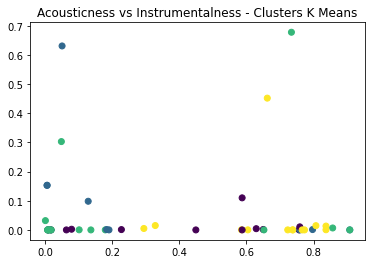

In [4]:
plt.scatter(featsDFData["acousticness"], featsDFData["instrumentalness"], c=featsDF["clusterLabel"])
plt.title("Acousticness vs Instrumentalness - Clusters K Means")

### Self Organizing Maps

In [5]:
featsArray=np.array(featsDFData)
featsArray


array([[ 6.70000e-01,  5.67000e-01,  2.00000e+00, -9.73200e+00,
         1.00000e+00,  3.57000e-02,  3.28000e-01,  1.50000e-02,
         8.73000e-02,  4.34000e-01,  1.39995e+02],
       [ 5.03000e-01,  5.98000e-01,  2.00000e+00, -8.27300e+00,
         1.00000e+00,  3.62000e-02,  1.28000e-01,  9.83000e-02,
         1.06000e-01,  1.96000e-01,  1.62905e+02],
       [ 4.68000e-01,  1.82000e-01,  0.00000e+00, -1.55620e+01,
         1.00000e+00,  4.01000e-02,  8.37000e-01,  1.32000e-02,
         6.78000e-02,  3.82000e-02,  1.55102e+02],
       [ 4.65000e-01,  2.67000e-01,  0.00000e+00, -1.42640e+01,
         1.00000e+00,  3.15000e-02,  7.34000e-01,  6.78000e-01,
         2.05000e-01,  7.57000e-02,  1.32002e+02],
       [ 4.45000e-01,  7.73000e-01,  2.00000e+00, -7.22700e+00,
         1.00000e+00,  4.41000e-02,  5.39000e-03,  1.53000e-01,
         1.31000e-01,  3.13000e-01,  1.91966e+02],
       [ 4.45000e-01,  7.73000e-01,  2.00000e+00, -7.22700e+00,
         1.00000e+00,  4.41000e-02,  5.39

In [6]:
from sklearn_som.som import SOM
from matplotlib.colors import ListedColormap

spotify_som = SOM(m=3, n=1, dim=11)

SOMClassification=spotify_som.fit(featsArray)

predictions=spotify_som.predict(featsArray)

featsLabel=["danceability","energy","key","loudness","mode", "speechiness", "acousticness","instrumentalness", "liveness", "valence", "tempo"]


Text(0.5, 1.0, 'Classes')

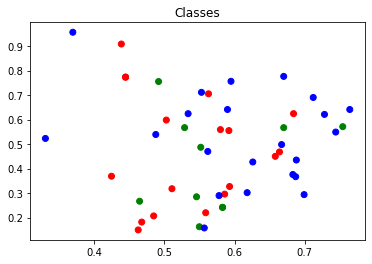

In [7]:
## Plot the results
x = featsArray[:,0]
y = featsArray[:,1]
colors = ['red', 'green', 'blue']

plt.scatter(x, y, c=predictions, cmap=ListedColormap(colors))
plt.title('Classes')

### PCA - Principal Components Analysis

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
pca.fit(featsArray)

comp=(1,2,3,4,5,6,7,8,9,10,11)

expl_variance=(pca.explained_variance_ratio_)
print(expl_variance)


[9.80618757e-01 1.13908254e-02 7.59252676e-03 2.27999066e-04
 8.81893091e-05 3.85847284e-05 2.07844857e-05 9.99965151e-06
 7.76146316e-06 3.53215052e-06 1.03972829e-06]


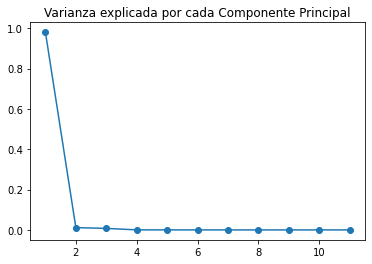

In [9]:
plt.scatter(x=comp, y=expl_variance )
plt.plot(comp, expl_variance )
plt.title("Varianza explicada por cada Componente Principal")
plt.show()